<a href="https://colab.research.google.com/github/pavancos/curve/blob/main/CurveMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

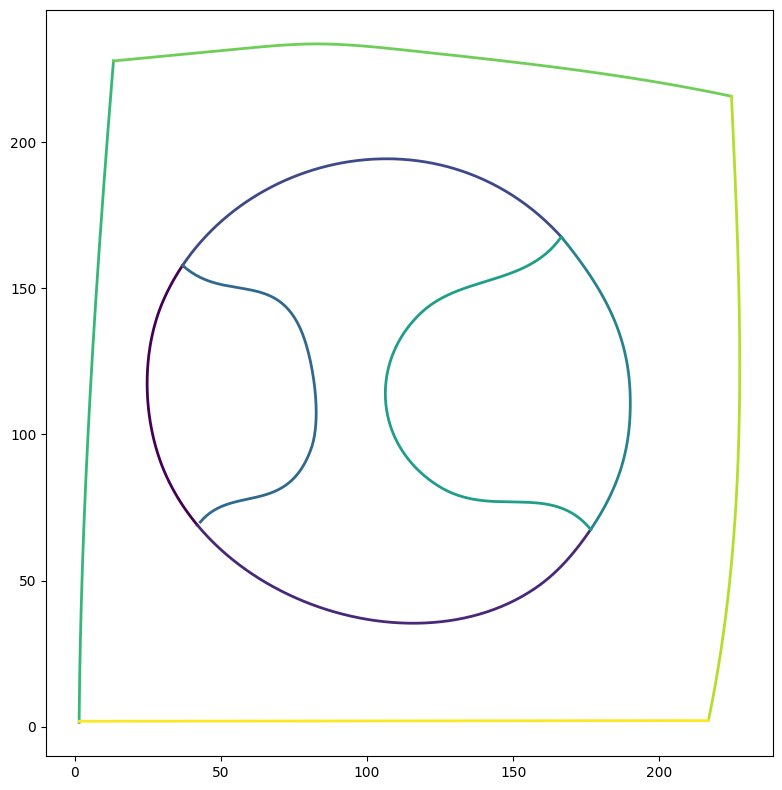

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from skimage.draw import ellipse
from scipy.optimize import least_squares
from skimage.measure import regionprops, label

# Load CSV data
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Plot data
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = plt.cm.viridis(np.linspace(0, 1, len(paths_XYs)))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Fit a line to points
def fit_line(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)
    return model.coef_[0], model.intercept_

# Detect straight lines
def detect_straight_lines(paths_XYs):
    for path in paths_XYs:
        for points in path:
            slope, intercept = fit_line(points)
            print(f"Detected line with slope: {slope}, intercept: {intercept}")

# Fit a circle to points
def fit_circle(points):
    def objective(params):
        xc, yc, r = params
        return np.sqrt((points[:, 0] - xc)**2 + (points[:, 1] - yc)**2) - r

    # Initial guess
    x_m = np.mean(points[:, 0])
    y_m = np.mean(points[:, 1])
    r_guess = np.mean(np.sqrt((points[:, 0] - x_m)**2 + (points[:, 1] - y_m)**2))
    initial_guess = [x_m, y_m, r_guess]

    result = least_squares(objective, initial_guess)
    xc, yc, r = result.x
    return xc, yc, r

# Detect circles
def detect_circles(paths_XYs):
    for path in paths_XYs:
        for points in path:
            xc, yc, r = fit_circle(points)
            print(f"Detected circle with center: ({xc}, {yc}), radius: {r}")

# Fit an ellipse to points
def fit_ellipse(points):
    from skimage.draw import ellipse_perimeter
    from skimage.measure import EllipseModel

    x = points[:, 0]
    y = points[:, 1]

    if len(x) < 5:
        return None

    model = EllipseModel()
    model.estimate(np.column_stack((x, y)))
    xc, yc, a, b, theta = model.params

    return xc, yc, a, b, theta

# Detect ellipses
def detect_ellipses(paths_XYs):
    for path in paths_XYs:
        for points in path:
            result = fit_ellipse(points)
            if result:
                xc, yc, a, b, theta = result
                print(f"Detected ellipse with center: ({xc}, {yc}), axes: ({a}, {b}), angle: {theta}")

# Detect rectangles (basic approximation)
def detect_rectangles(paths_XYs):
    for path in paths_XYs:
        for points in path:
            if len(points) >= 4:
                # Placeholder logic for detecting rectangles
                print("Detected potential rectangle")

# Detect regular polygons (basic approximation)
def detect_polygons(paths_XYs):
    for path in paths_XYs:
        for points in path:
            if len(points) >= 3:
                # Placeholder logic for detecting regular polygons
                print("Detected potential polygon")

# Main function
def main():
    csv_path = '/content/drive/MyDrive/problems/frag0.csv'  # Update with your CSV file path
    path_XYs = read_csv(csv_path)

    # Visualize the input data
    plot(path_XYs)

    # Detect different shapes
    detect_straight_lines(path_XYs)
    detect_circles(path_XYs)
    detect_ellipses(path_XYs)
    detect_rectangles(path_XYs)
    detect_polygons(path_XYs)

if __name__ == '__main__':
    main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


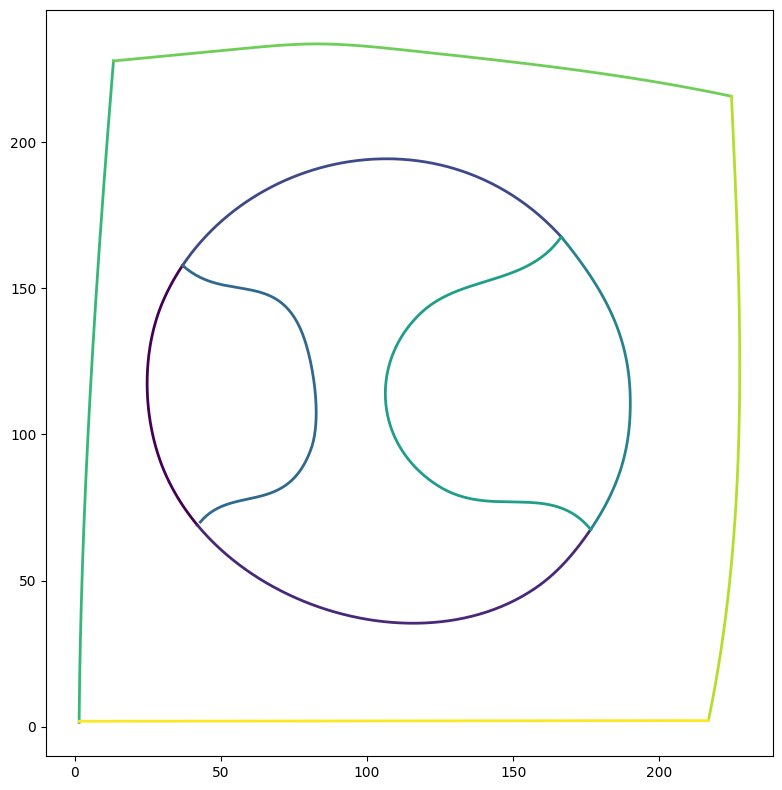

Detected line with slope: -1.8554965503132939, intercept: 167.86802889193012
Detected line with slope: -0.038687589837550204, intercept: 50.60680291402279
Detected line with slope: 0.08145946747469807, intercept: 175.2306832998962
Detected line with slope: -0.25348645626091615, intercept: 131.31110948183024
Detected line with slope: -2.1883069586951245, intercept: 520.2746535735113
Detected line with slope: -0.179859948267537, intercept: 136.5571325561847
Detected line with slope: 18.174525136362895, intercept: 5.398784144853991
Detected line with slope: -0.064707220866542, intercept: 235.50506216360046
Detected line with slope: 15.078528919666713, intercept: -3286.106466679529
Detected line with slope: 0.001073341490665822, intercept: 1.8743233100233543
Detected circle with center: (100.26763351543761, 116.9776987045931), radius: 75.58940568430408
Detected circle with center: (111.9255631899564, 121.81880401388611), radius: 86.52187601481639
Detected circle with center: (105.828202280

In [ ]:
# Main function
def main():
    csv_path = '/content/drive/MyDrive/problems/frag0.csv'  # Update with your CSV file path
    path_XYs = read_csv(csv_path)

    # Visualize the input data
    plot(path_XYs)

    # Detect different shapes
    detect_straight_lines(path_XYs)
    detect_circles(path_XYs)
    detect_ellipses(path_XYs)
    detect_rectangles(path_XYs)
    detect_polygons(path_XYs)

if __name__ == '__main__':
    main()

In [ ]:
# Main function
def main():
    csv_path = '/content/frag2.csv'  # Update with your CSV file path
    path_XYs = read_csv(csv_path)

    # Visualize the input data
    plot(path_XYs)

    # Detect different shapes
    detect_straight_lines(path_XYs)
    detect_circles(path_XYs)
    detect_ellipses(path_XYs)
    detect_rectangles(path_XYs)
    detect_polygons(path_XYs)

if __name__ == '__main__':
    main()

FileNotFoundError: /content/frag2.csv not found.

In [ ]:
import numpy as np
import csv
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from shapely.geometry import Polygon
from scipy.spatial import ConvexHull

# Load CSV data
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Fit a line to points
def fit_line(points):
    X = points[:, 0].reshape(-1, 1)
    y = points[:, 1]
    model = LinearRegression().fit(X, y)
    return model.coef_[0], model.intercept_

def regularize_line(points):
    slope, intercept = fit_line(points)
    x_min, x_max = np.min(points[:, 0]), np.max(points[:, 0])
    y_min, y_max = slope * x_min + intercept, slope * x_max + intercept
    return np.array([[x_min, y_min], [x_max, y_max]])

# Fit a circle to points
def circle_residuals(params, x, y):
    xc, yc, r = params
    return (x - xc)**2 + (y - yc)**2 - r**2

def fit_circle(points):
    x, y = points[:, 0], points[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    r0 = np.mean(np.sqrt((x - x_m)**2 + (y - y_m)**2))
    result = minimize(lambda params: np.sum(circle_residuals(params, x, y)),
                      [x_m, y_m, r0],
                      method='L-BFGS-B',
                      options={'maxiter': 1000})
    xc, yc, r = result.x
    return xc, yc, r

def regularize_circle(points):
    xc, yc, r = fit_circle(points)
    theta = np.linspace(0, 2 * np.pi, 100)
    x = xc + r * np.cos(theta)
    y = yc + r * np.sin(theta)
    return np.column_stack((x, y))

# Fit an ellipse to points
def ellipse_residuals(params, x, y):
    a, b, x0, y0, theta = params
    x_rot = (x - x0) * np.cos(theta) + (y - y0) * np.sin(theta)
    y_rot = -(x - x0) * np.sin(theta) + (y - y0) * np.cos(theta)
    return (x_rot**2 / a**2) + (y_rot**2 / b**2) - 1

def fit_ellipse(points):
    x, y = points[:, 0], points[:, 1]
    params_initial = [np.ptp(x)/2, np.ptp(y)/2, np.mean(x), np.mean(y), 0]
    result = minimize(lambda params: np.sum(ellipse_residuals(params, x, y)),
                      params_initial,
                      method='L-BFGS-B',
                      options={'maxiter': 1000})
    return result.x

def regularize_ellipse(points):
    a, b, x0, y0, theta = fit_ellipse(points)
    t = np.linspace(0, 2 * np.pi, 100)
    x = x0 + a * np.cos(t) * np.cos(theta) - b * np.sin(t) * np.sin(theta)
    y = y0 + a * np.cos(t) * np.sin(theta) + b * np.sin(t) * np.cos(theta)
    return np.column_stack((x, y))

# Fit a rectangle to points
def fit_rectangle(points):
    hull = ConvexHull(points)
    vertices = points[hull.vertices]
    return vertices

def regularize_rectangle(points):
    vertices = fit_rectangle(points)
    # Assuming vertices are in clockwise or counter-clockwise order
    return np.vstack((vertices, vertices[0]))  # To close the rectangle

# Fit a polygon to points
def fit_polygon(points):
    hull = ConvexHull(points)
    vertices = points[hull.vertices]
    return vertices

def regularize_polygon(points):
    vertices = fit_polygon(points)
    # Assuming vertices are in clockwise or counter-clockwise order
    return np.vstack((vertices, vertices[0]))  # To close the polygon

# Determine shape and regularize
def regularize_shapes(paths_XYs):
    regularized_paths = []
    for path in paths_XYs:
        for points in path:
            if is_line(points):
                regularized = regularize_line(points)
            elif is_circle(points):
                regularized = regularize_circle(points)
            elif is_ellipse(points):
                regularized = regularize_ellipse(points)
            elif is_rectangle(points):
                regularized = regularize_rectangle(points)
            elif is_polygon(points):
                regularized = regularize_polygon(points)
            else:
                continue
            regularized_paths.append(regularized)
    return regularized_paths

# Save regularized curves to CSV
def save_to_csv(paths_XYs, csv_path):
    with open(csv_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        for i, path in enumerate(paths_XYs):
            for points in path:
                if isinstance(points, np.ndarray) and points.ndim > 1:
                    for p in points:
                        csvwriter.writerow([i] + list(p))
                elif isinstance(points, np.ndarray):
                    csvwriter.writerow([i] + list(points))
                else:
                    csvwriter.writerow([i] + [points])

# Implement detection functions for shapes
def is_line(points):
    if len(points) < 2:
        return False
    slope, intercept = fit_line(points)
    y_pred = points[:, 0] * slope + intercept
    residuals = np.abs(points[:, 1] - y_pred)
    return np.all(residuals < np.mean(residuals) * 1.5)

def is_circle(points):
    if len(points) < 3:
        return False
    xc, yc, r = fit_circle(points)
    x, y = points[:, 0], points[:, 1]
    residuals = np.abs((x - xc)**2 + (y - yc)**2 - r**2)
    return np.all(residuals < np.mean(residuals) * 1.5)

def is_ellipse(points):
    if len(points) < 5:
        return False
    a, b, x0, y0, theta = fit_ellipse(points)
    x, y = points[:, 0], points[:, 1]
    residuals = np.abs((x - x0) * np.cos(theta) + (y - y0) * np.sin(theta))**2 / a**2 + \
                np.abs(-(x - x0) * np.sin(theta) + (y - y0) * np.cos(theta))**2 / b**2 - 1
    return np.all(residuals < np.mean(residuals) * 1.5)

def is_rectangle(points):
    if len(points) < 4:
        return False
    polygon = Polygon(points)
    return polygon.is_valid and len(polygon.exterior.coords) == 5

def is_polygon(points):
    return len(points) >= 3

# Main function
def main():
    csv_path = '/content/frag0.csv'
    output_csv_path = '/content/frag0_output.csv'

    # Load and process shapes
    path_XYs = read_csv(csv_path)
    regularized_paths = regularize_shapes(path_XYs)

    # Save regularized shapes to CSV
    save_to_csv(regularized_paths, output_csv_path)

if __name__ == '__main__':
    main()


plotting generated csv

In [ ]:
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Plot data
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = plt.cm.viridis(np.linspace(0, 1, len(paths_XYs)))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()
# Main function
def main():
    csv_path = '/content/frag0_output.csv'  # Update with your CSV file path
    path_XYs = read_csv(csv_path)

    # Visualize the input data
    plot(path_XYs)

    # Detect different shapes
    detect_straight_lines(path_XYs)
    detect_circles(path_XYs)
    detect_ellipses(path_XYs)
    detect_rectangles(path_XYs)
    detect_polygons(path_XYs)

if __name__ == '__main__':
    main()

In [ ]:
!pip install svgwrite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install cairosvg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00


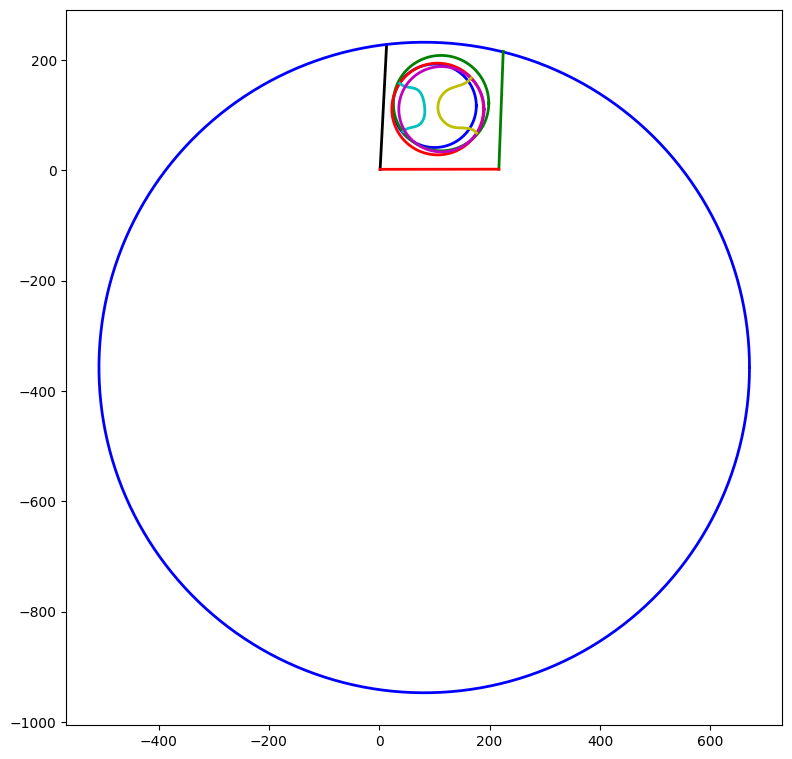

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Read CSV Function
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)

    return path_XYs

# Curve Identification Functions
def is_line(XYs, tolerance=0.01):
    if len(XYs) < 2:
        return False
    # Calculate differences between points
    diffs = np.diff(XYs, axis=0)
    # Calculate angles between differences
    angles = np.arctan2(diffs[:, 1], diffs[:, 0])
    # Check if all angles are roughly the same
    return np.all(np.abs(np.diff(angles)) < tolerance)

def is_circle(XYs, tolerance=0.01):
    if len(XYs) < 3:
        return False
    # Fit a circle using least squares
    def calc_R(xc, yc):
        return np.sqrt((XYs[:, 0] - xc)**2 + (XYs[:, 1] - yc)**2)

    def cost_function(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()

    center_estimate = np.mean(XYs, axis=0)
    result = least_squares(cost_function, center_estimate)
    xc, yc = result.x
    radius = calc_R(xc, yc).mean()

    # Check if the variation in radii is within tolerance
    return np.std(calc_R(xc, yc)) / radius < tolerance

# Curve Regularization Functions
def regularize_line(XYs):
    p1, p2 = XYs[0], XYs[-1]
    t = np.linspace(0, 1, len(XYs))[:, None]
    return p1 + t * (p2 - p1)

def regularize_circle(XYs):
    def calc_R(xc, yc):
        return np.sqrt((XYs[:, 0] - xc)**2 + (XYs[:, 1] - yc)**2)

    def cost_function(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()

    center_estimate = np.mean(XYs, axis=0)
    result = least_squares(cost_function, center_estimate)
    xc, yc = result.x
    radius = calc_R(xc, yc).mean()

    angles = np.linspace(0, 2 * np.pi, len(XYs))
    return np.array([np.array([xc + radius * np.cos(a), yc + radius * np.sin(a)]) for a in angles])

def regularize_curve(XYs):
    if is_line(XYs):
        return regularize_line(XYs)
    elif is_circle(XYs):
        return regularize_circle(XYs)
    # Add more regularization options if needed
    return XYs

# Write Regularized Shapes to CSV
def write_csv(path_XYs, output_csv):
    lines = []
    for i, path in enumerate(path_XYs):
        for j, XYs in enumerate(path):
            for point in XYs:
                lines.append(f"{i},0,{point[0]},{point[1]}")
    with open(output_csv, 'w') as f:
        f.write("\n".join(lines))

# Plot Function
def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()

# Example usage
csv_path = '/content/drive/MyDrive/problems/frag0.csv'
output_csv = 'regularized_output.csv'

paths_XYs = read_csv(csv_path)

# Regularize Curves
processed_paths = []
for path_XYs in paths_XYs:
    new_path_XYs = []
    for XY in path_XYs:
        regularized = regularize_curve(XY)
        new_path_XYs.append(regularized)
    processed_paths.append(new_path_XYs)

# Write Regularized Curves to CSV
write_csv(processed_paths, output_csv)

# Plot Regularized Curves
plot(processed_paths)


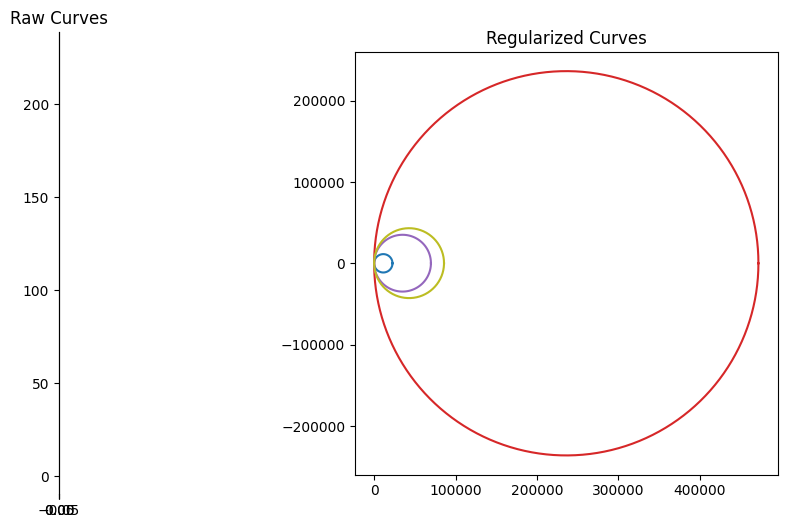

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Read CSV Function
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',', skip_header=1)
    paths = []

    for i in np.unique(np_path_XYs[:, 0]):
        path = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:3]
        paths.append(path)

    return paths

# Curve Identification Functions
def is_line(XYs, tolerance=0.01):
    if len(XYs) < 2:
        return False
    diffs = np.diff(XYs, axis=0)
    angles = np.arctan2(diffs[:, 1], diffs[:, 0])
    return np.all(np.abs(np.diff(angles)) < tolerance)

def is_circle(XYs, tolerance=0.01):
    if len(XYs) < 3:
        return False
    def calc_R(xc, yc):
        return np.sqrt((XYs[:, 0] - xc)**2 + (XYs[:, 1] - yc)**2)
    def cost_function(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    center_estimate = np.mean(XYs, axis=0)
    result = least_squares(cost_function, center_estimate)
    xc, yc = result.x
    radius = calc_R(xc, yc).mean()
    return np.std(calc_R(xc, yc)) / radius < tolerance

# Regularization Functions
def regularize_line(XYs):
    p1, p2 = XYs[0], XYs[-1]
    t = np.linspace(0, 1, len(XYs))[:, None]
    return p1 + t * (p2 - p1)

def regularize_circle(XYs):
    def calc_R(xc, yc):
        return np.sqrt((XYs[:, 0] - xc)**2 + (XYs[:, 1] - yc)**2)
    def cost_function(c):
        Ri = calc_R(*c)
        return Ri - Ri.mean()
    center_estimate = np.mean(XYs, axis=0)
    result = least_squares(cost_function, center_estimate)
    xc, yc = result.x
    radius = calc_R(xc, yc).mean()
    angles = np.linspace(0, 2 * np.pi, len(XYs))
    return np.array([np.array([xc + radius * np.cos(a), yc + radius * np.sin(a)]) for a in angles])

def regularize_curve(XYs):
    if is_line(XYs):
        return regularize_line(XYs)
    elif is_circle(XYs):
        return regularize_circle(XYs)
    return XYs

# Write Regularized Shapes to CSV
def write_csv(file_name, curves):
    lines = []
    for i, XYs in enumerate(curves):
        for point in XYs:
            lines.append(f"{i},{point[0]},{point[1]}")
    with open(file_name, 'w') as f:
        f.write("ID,X,Y\n")
        f.write("\n".join(lines))

# Plot Function
def plot_curves(raw_curves, regularized_curves):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for curve in raw_curves:
        axes[0].plot(curve[:, 0], curve[:, 1], label='Raw Curve')
    for curve in regularized_curves:
        axes[1].plot(curve[:, 0], curve[:, 1], label='Regularized Curve')
    axes[0].set_title('Raw Curves')
    axes[1].set_title('Regularized Curves')
    for ax in axes:
        ax.set_aspect('equal')
    plt.show()

# Example usage
csv_path = '/content/drive/MyDrive/problems/frag0.csv'
output_csv = 'frag01_sol.csv'

# Read raw data
raw_curves = read_csv(csv_path)

# Regularize Curves
regularized_curves = [regularize_curve(curve) for curve in raw_curves]

# Write regularized data to CSV
write_csv(output_csv, regularized_curves)

# Plot the curves
plot_curves(raw_curves, regularized_curves)
